# Downloading Data 

In [7]:
! mkdir ~/.kaggle.

mkdir: cannot create directory ‘/root/.kaggle.’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c predict-potential-spammers-on-fiverr

 54% 5.00M/9.18M [00:00<00:00, 12.2MB/s]
100% 9.18M/9.18M [00:00<00:00, 21.7MB/s]


In [11]:
!unzip predict-potential-spammers-on-fiverr.zip

Archive:  predict-potential-spammers-on-fiverr.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Going Through the Data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression


train = pd.read_csv('train.csv')
test  =  pd.read_csv('test.csv')
sample_sub  = pd.read_csv('sample_submission.csv')

In [13]:
train.shape, test.shape, sample_sub.shape

((458798, 53), (24148, 52), (24148, 2))

In [14]:
train.head()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,1,20972,14,13,3,11,1,2,15,...,0,0,0,0,0,0,0,0,1,0
1,0,2,7362,213,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
2,0,3,21216,215,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2261,212,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0
4,0,5,4543,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 53 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   label    458798 non-null  int64  
 1   user_id  458798 non-null  int64  
 2   X1       458798 non-null  int64  
 3   X2       458798 non-null  int64  
 4   X3       458798 non-null  int64  
 5   X4       458798 non-null  int64  
 6   X5       458798 non-null  int64  
 7   X6       458798 non-null  int64  
 8   X7       458798 non-null  int64  
 9   X8       458798 non-null  int64  
 10  X9       458798 non-null  int64  
 11  X10      458798 non-null  int64  
 12  X11      458798 non-null  int64  
 13  X12      458798 non-null  int64  
 14  X13      458792 non-null  float64
 15  X14      458798 non-null  int64  
 16  X15      458798 non-null  int64  
 17  X16      458798 non-null  int64  
 18  X17      458798 non-null  int64  
 19  X18      458798 non-null  int64  
 20  X19      458798 non-null  

In [16]:
train.isna().sum()

label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        6
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

In [17]:
train = train.dropna(axis = 0,how = "any")

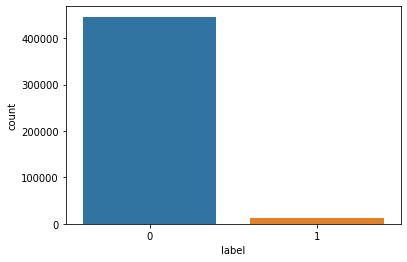

In [18]:
sns.countplot(data = train, x='label')

In [19]:
train.label.value_counts()

0    446471
1     12321
Name: label, dtype: int64

In [20]:
test.isna().sum()

user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

In [21]:
from xgboost import XGBClassifier
X = train.drop(columns = ['label'])
y = train.label

# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)


from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(X_resampled, y_resampled,test_size = .1, random_state = 0)


from sklearn.metrics import f1_score

In [22]:
y_val.value_counts()

0    44808
1    44487
Name: label, dtype: int64

In [23]:

xgb = XGBClassifier(tree_method = 'gpu_hist', learning_rate = .3, min_child_weight = 3)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_val)
print(f1_score(y_val, xgb_preds))

0.9564380863994929


In [24]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [25]:
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

cat = CatBoostClassifier(silent  = True, learning_rate  = .3)

cat.fit(X_train,y_train)
cat_preds = cat.predict(X_val)
print(f1_score(y_val, cat_preds))

0.9856676791540107


In [26]:
from sklearn import metrics
print(metrics.recall_score(y_val, cat_preds))
print(metrics.precision_score(y_val, cat_preds))

0.9847371142131409
0.9866000045042002


In [34]:
print(metrics.roc_auc_score(y_val, cat_preds))
print(metrics.accuracy_score(y_val, cat_preds))

0.9857291177207465
0.9857326838008847


In [27]:
print(metrics.confusion_matrix(y_val, cat_preds))

[[44213   595]
 [  679 43808]]


In [28]:
# pipe = make_pipeline(SelectKBest(score_func=chi2, k = 40),CatBoostClassifier(silent  = True, task_type = 'GPU') )
# pipe .fit(X_train,y_train)
# pipe_preds = pipe.predict(X_val)
# print(f1_score(y_val, pipe_preds))

# Approach 2. 
# using Automated machine learning to solve the challenge

# Make Submission

In [29]:
test_predictions = cat.predict(test)
sub_file = sample_sub.copy()
sub_file.drop('label', axis = 1, inplace = True)
sub_file['prediction'] = test_predictions
sub_file.to_csv('submission.csv', index = False)

!kaggle competitions submit -c predict-potential-spammers-on-fiverr -f submission.csv -m "catboost without gpu and  with smote"

100% 207k/207k [00:04<00:00, 44.2kB/s]
Successfully submitted to Predict Potential Spammers on Fiverr

In [30]:
sub_file.prediction.value_counts()

0    22802
1     1346
Name: prediction, dtype: int64

In [31]:
sample_sub.label.value_counts()

0    24144
1        4
Name: label, dtype: int64